In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from fastai.tabular.core import *
from fastai.data.transforms import *
from fastcore.all import *
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt

py.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot

pd.options.plotting.backend = "plotly"

import seaborn as sns
import matplotlib.pyplot as plt

## initial viz settings ##
sns.set(font_scale=1.2)
col = "#3B1C8C"
cm = "viridis"

<IPython.core.display.Javascript object>

In [4]:
path = Path(
    "/Users/gaurav.adlakha/Documents/attendance_s3_date/meetingattendance/attendance_meeting_append_data.csv"
)

<IPython.core.display.Javascript object>

In [5]:
%%time
df = pd.read_csv(path)

<timed exec>:1: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.



CPU times: user 52.3 s, sys: 20.6 s, total: 1min 12s
Wall time: 1min 16s


<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23035206 entries, 0 to 23035205
Data columns (total 27 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Unnamed: 0                   int64 
 1   SCHOOLYEAR                   int64 
 2   PRESENCE_STATUS_CD           object
 3   GRADE_LEVEL                  int64 
 4   COURSE_NAME                  object
 5   SCHOOLDCID                   int64 
 6   STUDENTID                    int64 
 7   LASTFIRST                    object
 8   SCHOOLID                     int64 
 9   STUDENTDCID                  int64 
 10  SECTIONENROLLMENTDCID        int64 
 11  CALENDARDCID                 int64 
 12  PERIODDCID                   int64 
 13  PERIODNAME                   object
 14  ATTENDANCECODEDCID           int64 
 15  SCHEDULINGTERMYEARDCID       int64 
 16  ATTENDANCEDATE               object
 17  ATTENDANCEMODECODE           object
 18  TOTALMINUTESATTENDED         int64 
 19  ATTENDANCECOMMENT  

<IPython.core.display.Javascript object>

In [7]:
# df = df_shrink(df, skip=["ATTENDANCEDATE"])
# df.info()

<IPython.core.display.Javascript object>

In [8]:
len(df)

23035206

<IPython.core.display.Javascript object>

In [9]:
%%time
# df = pd.read_csv(path)
make_date(df, "ATTENDANCEDATE")
add_datepart(df, "ATTENDANCEDATE")

CPU times: user 23.7 s, sys: 16.2 s, total: 39.9 s
Wall time: 41.3 s


,Unnamed: 0,SCHOOLYEAR,PRESENCE_STATUS_CD,GRADE_LEVEL,COURSE_NAME,SCHOOLDCID,STUDENTID,LASTFIRST,SCHOOLID,STUDENTDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
0,0,2017,Absent,11,CR American History II,4710,73254,"Haddock, Dominyk Haylei",260408,73254,...,14,0,134,False,False,False,False,False,False,1.526256e+09
1,1,2017,Absent,11,Library/Media Assist,4710,87498,"Burden Rozier, Tyanna Chrissy",260408,87498,...,17,3,137,False,False,False,False,False,False,1.526515e+09
2,2,2017,Absent,9,Principles of Business & Finance,4710,94998,"Royall, Kyson Catrina",260408,94998,...,22,1,142,False,False,False,False,False,False,1.526947e+09
3,3,2017,Absent,9,Visual Arts (Beginning),4710,141790,"Heyse, Gordon Kamaury",260408,660949,...,15,1,135,False,False,False,False,False,False,1.526342e+09
4,4,2017,Present,12,Visual Arts (Intermediate),4710,114606,"Okeke, Nakya Janya",260408,639214,...,15,1,135,False,False,False,False,False,False,1.526342e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035201,78295,2020,Present,9,Microsoft Word and PowerPoint,4710,131119,"Couch, Dennys Keirsten",260408,651545,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035202,78296,2020,Present,9,Microsoft Word and PowerPoint,4710,241483,"Huston, Isreal Allie",260408,749972,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035203,78297,2020,Present,10,Microsoft Word and PowerPoint,4710,164733,"Weisner, Ellyana Yadrian",260408,680476,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035204,78298,2020,Present,10,Microsoft Word and PowerPoint,4710,79595,"Moellmer, Duron Sheyla",260408,79595,...,19,0,293,False,False,False,False,False,False,1.603066e+09


<IPython.core.display.Javascript object>

In [10]:
list(df.columns)

['Unnamed: 0',
 'SCHOOLYEAR',
 'PRESENCE_STATUS_CD',
 'GRADE_LEVEL',
 'COURSE_NAME',
 'SCHOOLDCID',
 'STUDENTID',
 'LASTFIRST',
 'SCHOOLID',
 'STUDENTDCID',
 'SECTIONENROLLMENTDCID',
 'CALENDARDCID',
 'PERIODDCID',
 'PERIODNAME',
 'ATTENDANCECODEDCID',
 'SCHEDULINGTERMYEARDCID',
 'ATTENDANCEMODECODE',
 'TOTALMINUTESATTENDED',
 'ATTENDANCECOMMENT',
 'ATTENDANCE_CODE_DESCRIPTION',
 'ADAVALUECODE',
 'ADAVALUETIME',
 'ADMVALUE',
 'ATTENDANCEFLAGS',
 'SOURCESYSTEMID',
 'ATTENDANCEMODEFLAG',
 'ATTENDANCEDATEYear',
 'ATTENDANCEDATEMonth',
 'ATTENDANCEDATEWeek',
 'ATTENDANCEDATEDay',
 'ATTENDANCEDATEDayofweek',
 'ATTENDANCEDATEDayofyear',
 'ATTENDANCEDATEIs_month_end',
 'ATTENDANCEDATEIs_month_start',
 'ATTENDANCEDATEIs_quarter_end',
 'ATTENDANCEDATEIs_quarter_start',
 'ATTENDANCEDATEIs_year_end',
 'ATTENDANCEDATEIs_year_start',
 'ATTENDANCEDATEElapsed']

<IPython.core.display.Javascript object>

In [11]:
df.ATTENDANCEDATEYear.value_counts().plot(kind="barh")

<IPython.core.display.Javascript object>

In [12]:
df.ATTENDANCEDATEYear.value_counts()

2020    7452996
2021    5920408
2018    1576585
2017    1543119
2016    1541084
2019    1522369
2015    1491934
2014    1402096
2013     584593
2022         22
Name: ATTENDANCEDATEYear, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
df.set_index("ATTENDANCEDATEYear", inplace=True)

<IPython.core.display.Javascript object>

Data validation:
- Find total number of rows (present + absent) for a student in 2019. We can check for a few students in grade 12. They should be in ball park.
- Find total number of rows (present + absent) for a student in 2018. We can check for a few students in grade 12. They should be in ball park. If not, we have to ask Product.


In [14]:
df.loc[2019]["PRESENCE_STATUS_CD"].value_counts()  # .plot(kind="bar")

Absent     1039084
Present     483285
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
df.loc[2019]["PRESENCE_STATUS_CD"].value_counts().plot(kind="bar")

<IPython.core.display.Javascript object>

In [16]:
df.loc[2018]["PRESENCE_STATUS_CD"].value_counts()  # .plot(kind="bar")

Absent     1101741
Present     474844
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
df.loc[2018]["PRESENCE_STATUS_CD"].value_counts().plot(kind="bar")

<IPython.core.display.Javascript object>

In [18]:
df_grade_2019_12 = df.loc[2019][df.loc[2019].GRADE_LEVEL == 12]

<IPython.core.display.Javascript object>

In [19]:
df_grade_2019_12 = df_grade_2019_12.copy()

<IPython.core.display.Javascript object>

In [20]:
df_grade_2019_12.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

In [21]:
df_grade_2019_12.loc[79200]["PRESENCE_STATUS_CD"].value_counts()

Absent     30
Present     9
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
def get_attend_count(student_id, df):
    return df.loc[student_id]["PRESENCE_STATUS_CD"].value_counts()

<IPython.core.display.Javascript object>

In [23]:
get_attend_count(79200, df_grade_2019_12)

Absent     30
Present     9
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [24]:
df_grade_2019_12.sample(10).index

Int64Index([143692, 78038, 105363, 76513, 73157, 76478, 78675, 86547, 180265,
            74668],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [25]:
for idx in df_grade_2019_12.sample(10).index:
    print(get_attend_count(idx, df_grade_2019_12))
    print("------------------------------------------")

Absent     127
Present      3
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     40
Present     6
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     17
Present     2
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     73
Present    13
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     39
Present    10
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     72
Present     7
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     60
Present    12
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     104
Present     21
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     78
Present     3
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent

<IPython.core.display.Javascript object>

In [26]:
df_grade_2018_12 = df.loc[2018][df.loc[2018].GRADE_LEVEL == 12]

<IPython.core.display.Javascript object>

In [27]:
df_grade_2018_12 = df_grade_2018_12.copy()

<IPython.core.display.Javascript object>

In [28]:
df_grade_2018_12.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

In [29]:
df_grade_2018_12.sample(10).index

Int64Index([72016, 191801, 70075, 76544, 77330, 216065, 75703, 160062, 190933,
            68417],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [30]:
for idx in df_grade_2018_12.sample(10).index:
    print(get_attend_count(idx, df_grade_2018_12))
    print("------------------------------------------")

Absent     47
Present     3
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     84
Present     2
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     73
Present    27
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     120
Present      6
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Present    31
Absent     29
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     134
Present     22
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     49
Present    27
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     200
Present     37
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     10
Present     9
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Abse

<IPython.core.display.Javascript object>

Analysis:
- For 2019, let’s sort the students of grade 12 by maximum number of absences
- Find few student ids who are in middle (normal absence rate)
-Identify students with very high absence rate and ask the product
- Analyze an above selected student and count absence by course
- Analyze an above selected student and count absence by period
- Let’s do the above two analysis for a few students with normal absence rate in grade 12 (edited) 

In [31]:
df_2019 = df.loc[2019]

<IPython.core.display.Javascript object>

In [32]:
df_grade_2019_12 = df_2019[df_2019.GRADE_LEVEL == 12].copy()

<IPython.core.display.Javascript object>

In [33]:
df_grade_2019_12_Absent = df_grade_2019_12[
    df_grade_2019_12.PRESENCE_STATUS_CD == "Absent"
].copy()

<IPython.core.display.Javascript object>

In [34]:
df_grade_2019_12_Absent.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

In [35]:
df_grade_2019_12_Absent.groupby("STUDENTID").count()[
    "PRESENCE_STATUS_CD"
].sort_values()[::-1].plot(kind="scatter")

<IPython.core.display.Javascript object>

In [36]:
df_mid = (
    df_grade_2019_12_Absent.groupby("STUDENTID")
    .count()["PRESENCE_STATUS_CD"]
    .sort_values()[::-1]
)

<IPython.core.display.Javascript object>

In [37]:
df_mid[df_mid.values < 50][0:20]  #  50 count as mid value from scatter plot

STUDENTID
201303    49
92221     49
73714     49
195322    49
101794    49
74806     49
87996     49
73157     49
76149     49
75873     49
90613     49
74652     49
144079    49
166054    49
73375     49
162269    49
76816     49
73988     49
78740     49
79832     49
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
df_grade_2019_12_Absent.groupby("STUDENTID").count()[
    "PRESENCE_STATUS_CD"
].sort_values()[::-1][
    0:20
]  # top 20 high absent

STUDENTID
67757     414
71274     270
70704     265
77101     240
193393    229
177565    218
158695    215
72326     210
70736     208
69026     205
80080     203
72500     202
164448    195
77334     194
100327    191
219282    188
79227     187
66991     187
182795    187
75599     186
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [39]:
df.COURSE_NAME

ATTENDANCEDATEYear
2018              CR American History II
2018                Library/Media Assist
2018    Principles of Business & Finance
2018             Visual Arts (Beginning)
2018          Visual Arts (Intermediate)
                      ...               
2020      Microsoft Word and PowerPoint 
2020      Microsoft Word and PowerPoint 
2020      Microsoft Word and PowerPoint 
2020       Microsoft Word and PowerPoint
2020            Band (Intermediate) Fall
Name: COURSE_NAME, Length: 23035206, dtype: object

<IPython.core.display.Javascript object>

In [40]:
top_20_absent_count_student = (
    df_grade_2019_12_Absent.groupby("STUDENTID")
    .count()["PRESENCE_STATUS_CD"]
    .sort_values()[::-1][0:20]
)

<IPython.core.display.Javascript object>

In [41]:
top_20_absent_count_student.index

Int64Index([ 67757,  71274,  70704,  77101, 193393, 177565, 158695,  72326,
             70736,  69026,  80080,  72500, 164448,  77334, 100327, 219282,
             79227,  66991, 182795,  75599],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [42]:
df_heatmap = (
    df_grade_2019_12_Absent.loc[top_20_absent_count_student.index]
    .groupby(["STUDENTID", "COURSE_NAME"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack()
)

<IPython.core.display.Javascript object>

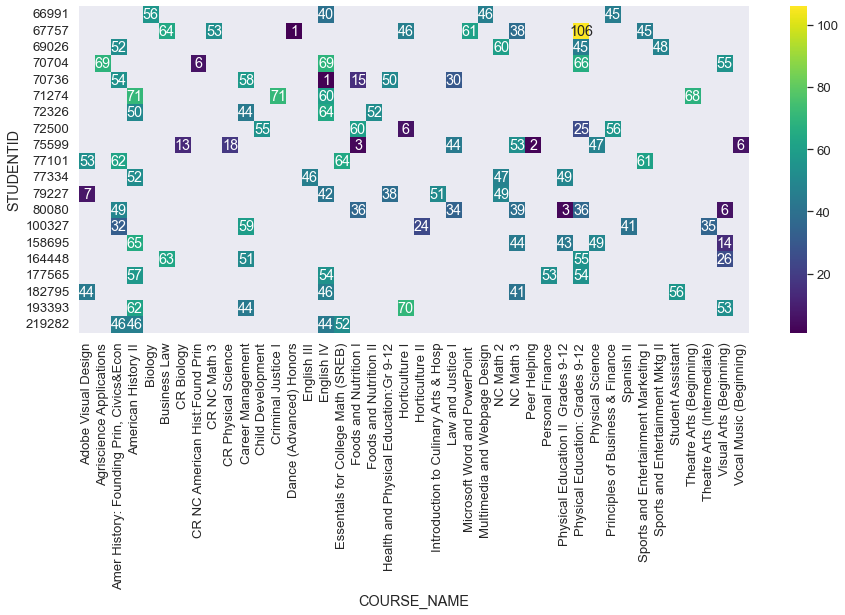

<IPython.core.display.Javascript object>

In [43]:
df_heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_heatmap, annot=True, fmt="g", cmap=cm)
plt.show()

In [44]:
mid_20_absent_count_student = df_mid[df_mid.values < 50][0:20]

<IPython.core.display.Javascript object>

In [45]:
mid_20_absent_count_student.index

Int64Index([201303,  92221,  73714, 195322, 101794,  74806,  87996,  73157,
             76149,  75873,  90613,  74652, 144079, 166054,  73375, 162269,
             76816,  73988,  78740,  79832],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [46]:
df_heatmap = (
    df_grade_2019_12_Absent.loc[mid_20_absent_count_student.index]
    .groupby(["STUDENTID", "COURSE_NAME"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack()
)

<IPython.core.display.Javascript object>

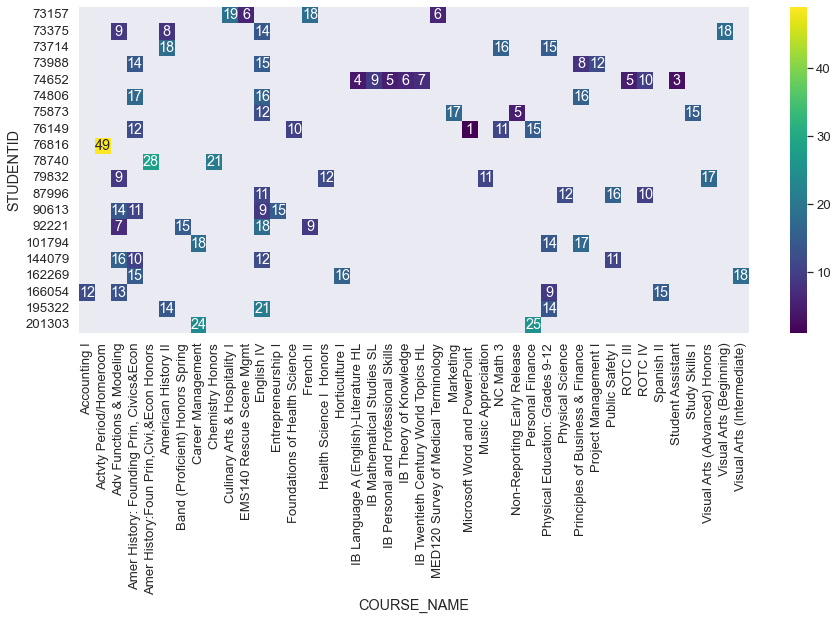

<IPython.core.display.Javascript object>

In [47]:
df_heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_heatmap, annot=True, fmt="g", cmap=cm)
plt.show()

In [48]:
list(df_grade_2019_12_Absent.columns)

['Unnamed: 0',
 'SCHOOLYEAR',
 'PRESENCE_STATUS_CD',
 'GRADE_LEVEL',
 'COURSE_NAME',
 'SCHOOLDCID',
 'LASTFIRST',
 'SCHOOLID',
 'STUDENTDCID',
 'SECTIONENROLLMENTDCID',
 'CALENDARDCID',
 'PERIODDCID',
 'PERIODNAME',
 'ATTENDANCECODEDCID',
 'SCHEDULINGTERMYEARDCID',
 'ATTENDANCEMODECODE',
 'TOTALMINUTESATTENDED',
 'ATTENDANCECOMMENT',
 'ATTENDANCE_CODE_DESCRIPTION',
 'ADAVALUECODE',
 'ADAVALUETIME',
 'ADMVALUE',
 'ATTENDANCEFLAGS',
 'SOURCESYSTEMID',
 'ATTENDANCEMODEFLAG',
 'ATTENDANCEDATEMonth',
 'ATTENDANCEDATEWeek',
 'ATTENDANCEDATEDay',
 'ATTENDANCEDATEDayofweek',
 'ATTENDANCEDATEDayofyear',
 'ATTENDANCEDATEIs_month_end',
 'ATTENDANCEDATEIs_month_start',
 'ATTENDANCEDATEIs_quarter_end',
 'ATTENDANCEDATEIs_quarter_start',
 'ATTENDANCEDATEIs_year_end',
 'ATTENDANCEDATEIs_year_start',
 'ATTENDANCEDATEElapsed']

<IPython.core.display.Javascript object>

In [49]:
mid_20_absent_count_student

STUDENTID
201303    49
92221     49
73714     49
195322    49
101794    49
74806     49
87996     49
73157     49
76149     49
75873     49
90613     49
74652     49
144079    49
166054    49
73375     49
162269    49
76816     49
73988     49
78740     49
79832     49
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [50]:
top_20_absent_count_student

STUDENTID
67757     414
71274     270
70704     265
77101     240
193393    229
177565    218
158695    215
72326     210
70736     208
69026     205
80080     203
72500     202
164448    195
77334     194
100327    191
219282    188
79227     187
66991     187
182795    187
75599     186
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [86]:
mid_20_absent_count_student.index

Int64Index([201303,  92221,  73714, 195322, 101794,  74806,  87996,  73157,
             76149,  75873,  90613,  74652, 144079, 166054,  73375, 162269,
             76816,  73988,  78740,  79832],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [89]:
# df_heatmap = (
#     df_grade_2019_12_Absent.groupby(["STUDENTID", "PERIODNAME"]).count()[
#         "PRESENCE_STATUS_CD"
#     ]
# ).unstack()

<IPython.core.display.Javascript object>

In [90]:
df_heatmap = (
    df_grade_2019_12_Absent.groupby(["STUDENTID", "PERIODNAME"])
    .count()["PRESENCE_STATUS_CD"][mid_20_absent_count_student.index]
    .unstack()
)

<IPython.core.display.Javascript object>

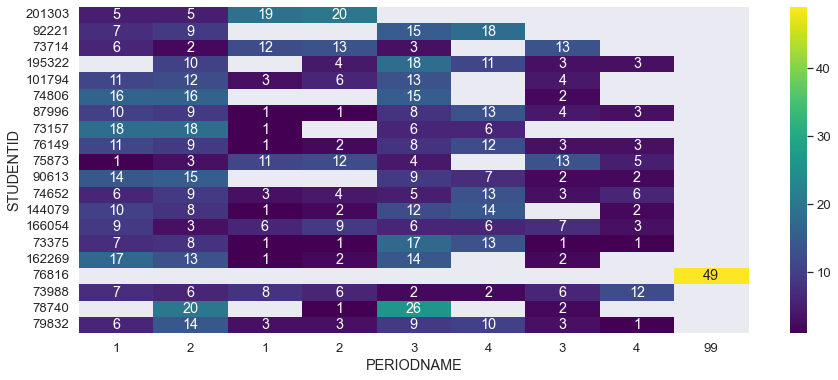

<IPython.core.display.Javascript object>

In [91]:
# df_heatmap
df_heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_heatmap, annot=True, fmt="g", cmap=cm)
plt.show()

In [93]:
top_20_absent_count_student.index

Int64Index([ 67757,  71274,  70704,  77101, 193393, 177565, 158695,  72326,
             70736,  69026,  80080,  72500, 164448,  77334, 100327, 219282,
             79227,  66991, 182795,  75599],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [94]:
df_heatmap = (
    df_grade_2019_12_Absent.groupby(["STUDENTID", "PERIODNAME"])
    .count()["PRESENCE_STATUS_CD"][top_20_absent_count_student.index]
    .unstack()
)

<IPython.core.display.Javascript object>

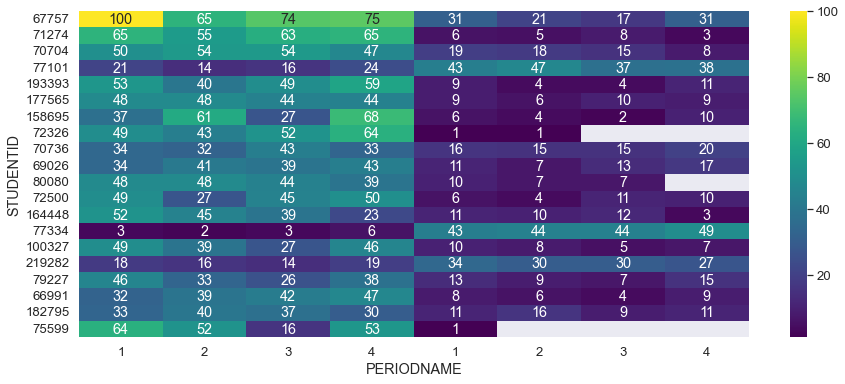

<IPython.core.display.Javascript object>

In [95]:
# df_heatmap
df_heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_heatmap, annot=True, fmt="g", cmap=cm)
plt.show()

In [102]:
df_grade_2019_12_Absent.groupby(["STUDENTID", "PERIODNAME"]).count()[
    "PRESENCE_STATUS_CD"
][top_20_absent_count_student.index].unstack()

PERIODNAME,1,2,3,4,1,2,3,4
STUDENTID,,,,,,,,
67757,100.0,65.0,74.0,75.0,31.0,21.0,17.0,31.0
71274,65.0,55.0,63.0,65.0,6.0,5.0,8.0,3.0
70704,50.0,54.0,54.0,47.0,19.0,18.0,15.0,8.0
77101,21.0,14.0,16.0,24.0,43.0,47.0,37.0,38.0
193393,53.0,40.0,49.0,59.0,9.0,4.0,4.0,11.0
177565,48.0,48.0,44.0,44.0,9.0,6.0,10.0,9.0
158695,37.0,61.0,27.0,68.0,6.0,4.0,2.0,10.0
72326,49.0,43.0,52.0,64.0,1.0,1.0,NaN,NaN
70736,34.0,32.0,43.0,33.0,16.0,15.0,15.0,20.0


<IPython.core.display.Javascript object>